
# ***Screen Time Analysis***



---














 ### ***Importing the necessary libraries***





In [1]:
import requests
import zipfile
import io

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')



```
 Downloading and extracting the dataset
```





In [2]:
url = "https://github.com/PavanBoyapalli/datasets/raw/master/ScreenTimeAnalysis.zip"

# Download the dataset
response = requests.get(url)
if response.status_code == 200:
    print("Dataset downloaded successfully!")

    # Extract the dataset
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall("ScreenTimeAnalysis")
        print("Dataset extracted to 'ScreenTimeAnalysis' folder.")
else:
    print(f"Failed to download dataset. HTTP Status Code: {response.status_code}")


Dataset downloaded successfully!
Dataset extracted to 'ScreenTimeAnalysis' folder.


### *Loading the Data*

In [3]:
data = pd.read_csv("/content/ScreenTimeAnalysis/ScreenTimeAnalysis/screentime_analysis.csv")

data.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [5]:
data.shape

(200, 5)

In [6]:
data.isnull().sum()

,0
Date,0
App,0
Usage (minutes),0
Notifications,0
Times Opened,0


### *Summary Statistics*

In [7]:
data.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000




---



***Exploratory Data Analysis***



> ***Understanding User Habits and Preferences***



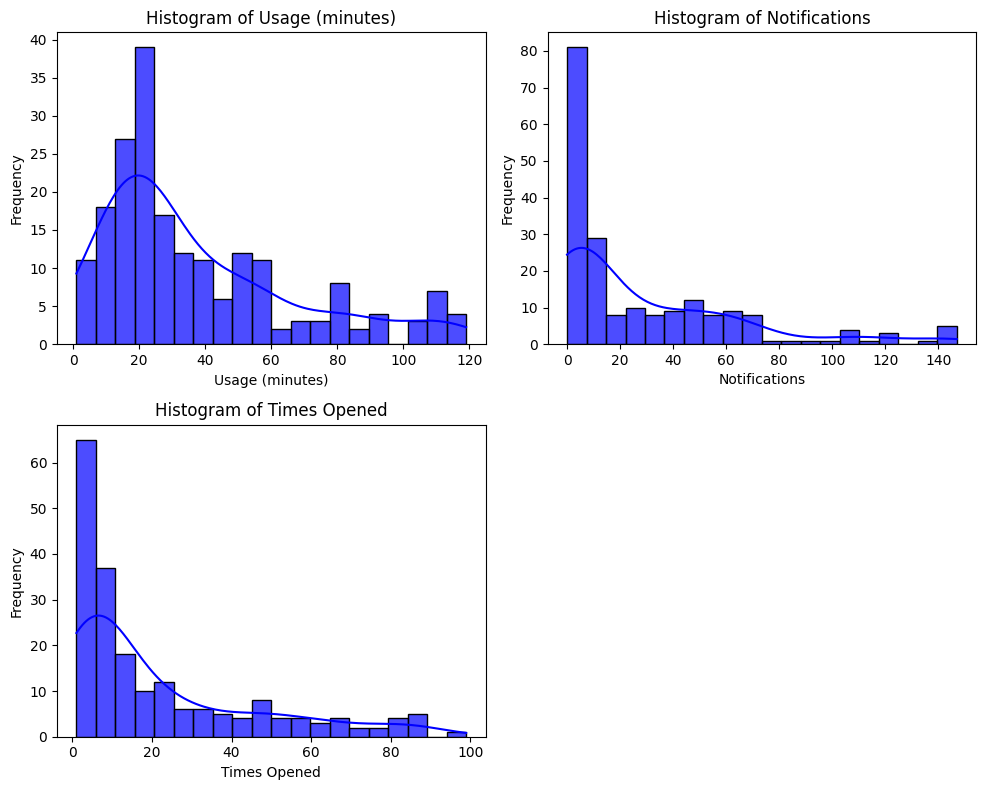

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs = axs.flatten()

features = ['Usage (minutes)', 'Notifications', 'Times Opened']

for i, feature in enumerate(features):
    sns.histplot(data[feature], bins=20, kde=True, ax=axs[i], color='blue', alpha=0.7)
    axs[i].set_title(f'Histogram of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')

axs[-1].axis('off')

plt.tight_layout()
plt.show()

<i>

# <span style="color: teal; font-size: 24px;">**Insights**</span>

---

### <span style="color: purple;">**1. Usage Time**</span>
<ul>
  <li>Most users have relatively <b>short usage sessions</b>, with the majority spending <b>less than 40 minutes per session</b>.</li>
  <li>A smaller group of users engages for <b>significantly longer periods</b>.</li>
</ul>

---

### <span style="color: orange;">**2. Notifications**</span>
<ul>
  <li>The majority of users receive a <b>moderate number of notifications</b>, with fewer than <b>40 notifications</b> being the norm.</li>
  <li>A smaller segment receives a <b>higher number of notifications</b>.</li>
</ul>

---

### <span style="color: green;">**3. App Open Frequency**</span>
<ul>
  <li>Users tend to open the app a <b>moderate number of times</b>, with a peak around <b>20-30 times</b>.</li>
  <li>The distribution is relatively even, indicating <b>consistent usage patterns</b>.</li>
</ul>

---
</i>



> ***Relationships between Screen Time,
Notifications and Times Opened***





<Figure size 800x600 with 0 Axes>

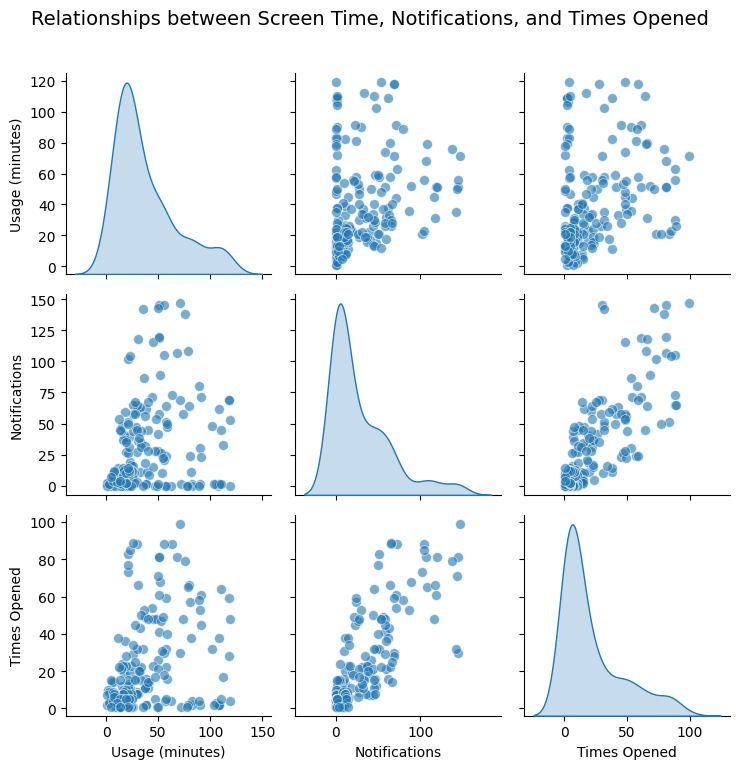

In [9]:
plt.figure(figsize=(8, 6))

pairplot = sns.pairplot(
    data[['Usage (minutes)', 'Notifications', 'Times Opened']],
    kind="scatter",
    diag_kind="kde",
    plot_kws={'alpha':0.6, 's':50}
)

pairplot.fig.suptitle('Relationships between Screen Time, Notifications, and Times Opened', y=1.02, fontsize=14)

plt.tight_layout()

plt.show()

<i>

<h1 style="color: teal;">Pair Plot Analysis</h1>
<hr>

<h3 style="color: purple;">Key Observations</h3>
<ol>
  <li><b>Relationships:</b>
    <ul>
      <li>The pair plot shows relationships between <b>screen time (usage in minutes)</b>, <b>notifications</b>, and <b>times an app was opened</b>.</li>
      <li>Scatter plots indicate:
        <ul>
          <li>A moderate <b>positive correlation</b> between <b>notifications</b> and <b>times opened</b>.</li>
          <li>A moderate <b>positive correlation</b> between <b>times opened</b> and <b>usage minutes</b>.</li>
        </ul>
      </li>
      <li>This suggests that <b>more notifications</b> lead to <b>increased app usage and openings</b>.</li>
    </ul>
  </li>
  <li><b>Weaker Correlation:</b>
    <ul>
      <li>The correlation between <b>usage</b> and <b>notifications</b> is <b>weaker</b>, indicating that:
        <ul>
          <li>Receiving many notifications does not always result in higher screen time.</li>
        </ul>
      </li>
    </ul>
  </li>
  <li><b>Data Distribution:</b>
    <ul>
      <li>Histograms on the diagonal show that <b>most data points cluster around low values</b> for:
        <ul>
          <li><b>Usage</b></li>
          <li><b>Notifications</b></li>
          <li><b>Times opened</b></li>
        </ul>
      </li>
    </ul>
  </li>
</ol>

</i>


---
### Now, let’s analyze the top apps based on screen time and break down the average usage, notifications, and times opened per app. It will give us a clearer picture of user behaviour across apps

In [10]:
app_analysis = data.groupby('App').agg(
    avg_usage=('Usage (minutes)', 'mean'),
    avg_notifications=('Notifications', 'mean'),
    avg_times_opened=('Times Opened', 'mean')
).reset_index()

app_analysis = app_analysis.sort_values(by='avg_usage', ascending=False)

app_analysis

,App,avg_usage,avg_notifications,avg_times_opened
2,Instagram,75.92,49.80,41.56
4,Netflix,72.76,0.44,2.56
6,WhatsApp,48.16,99.92,68.24
1,Facebook,33.68,39.72,30.20
7,X,27.00,25.84,13.16
0,8 Ball Pool,18.08,4.52,7.28
3,LinkedIn,15.60,8.92,4.76
5,Safari,10.80,0.72,5.28


<h1 style="color: teal;">App Usage Insights</h1>
<hr>

<h3 style="color: purple;">Key Observations</h3>

<ol>
  <li><b>Instagram:</b>
    <ul>
      <li>Leads in both <b>screen time</b> and <b>notifications</b>.</li>
      <li>Averages:
        <ul>
          <li><b>76 minutes</b> of usage per day.</li>
          <li><b>49 notifications</b>.</li>
          <li>Opened around <b>41 times</b>.</li>
        </ul>
      </li>
    </ul>
  </li>
  <li><b>WhatsApp:</b>
    <ul>
      <li>Ranks second in terms of <b>times opened</b> (averaging <b>68 times</b>).</li>
      <li>Receives a very high number of <b>notifications</b> (around <b>100</b>).</li>
      <li><b>Screen time</b> is lower than Instagram and Netflix.</li>
    </ul>
  </li>
  <li><b>Netflix:</b>
    <ul>
      <li>Users spend significant time (<b>72 minutes/day</b>) on Netflix.</li>
      <li>Stands out for its low interaction frequency:
        <ul>
          <li><b>2.56 app opens</b>.</li>
          <li>Almost <b>no notifications</b>.</li>
        </ul>
      </li>
      <li>Reflects long, continuous usage (e.g., watching shows or movies).</li>
    </ul>
  </li>
  <li><b>Other Apps:</b>
    <ul>
      <li>Apps like <b>Facebook</b>, <b>LinkedIn</b>, and <b>Safari</b> have lower usage and interaction metrics.</li>
      <li>Used less frequently and for shorter sessions.</li>
    </ul>
  </li>
</ol>




---
* ***Data Aggregation***



In [11]:
data['Date'] = pd.to_datetime(data['Date'])

data['Day of Week'] = data['Date'].dt.day_name()

weekly_usage = data.groupby('Day of Week')['Usage (minutes)'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])



> ***Weekly User Engagement Patterns***





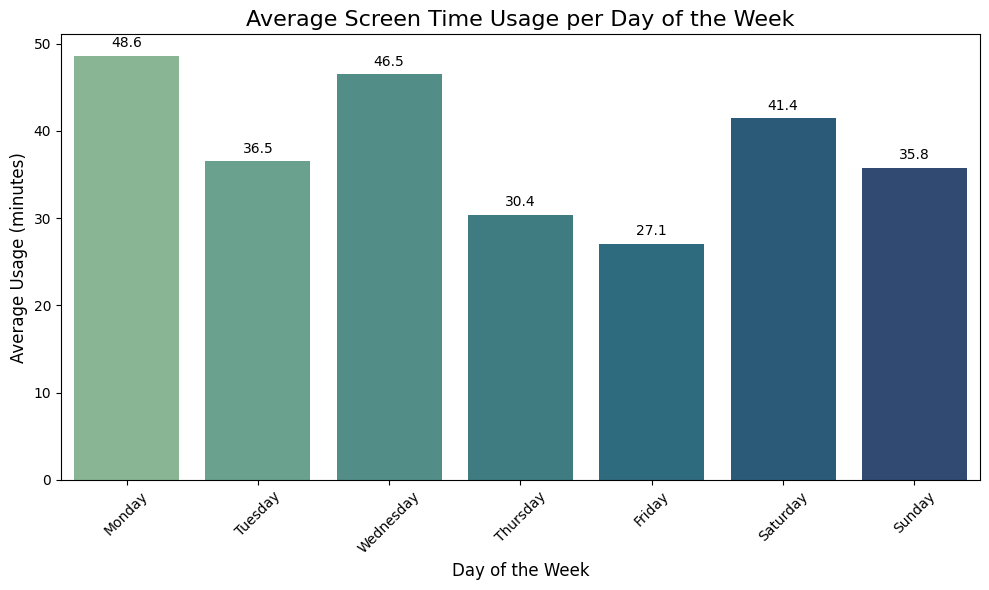

In [12]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=weekly_usage.index, y=weekly_usage.values, palette="crest")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points')

plt.title('Average Screen Time Usage per Day of the Week', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

<h1 style="color: teal;">Weekly Screen Time Insights</h1>
<hr>

<h3 style="color: purple;">Key Observations</h3>
<ul>
  <li>The highest usage occurs on <b>Monday</b> and <b>Wednesday</b>, indicating that the <b>beginning</b> and <b>middle of the week</b> see the most screen time.</li>
  <li><b>Usage decreases towards the end of the week</b>, with <b>Friday</b> having the <b>lowest average</b>.</li>
  <li><b>Screen time increases again on Saturday</b> and slightly drops on <b>Sunday</b>.</li>
</ul>

<p>This pattern suggests <b>higher screen engagement</b> during <b>workdays</b> and <b>moderate usage over the weekend</b>.</p>

---


### Now, let’s analyze the daily patterns for the top three apps: Instagram, Netflix, and WhatsApp. It will give us insights into how users engage with these apps throughout the week:

In [13]:
top_apps_data = data[data['App'].isin(['Instagram', 'Netflix', 'WhatsApp'])]

daily_app_usage = top_apps_data.groupby(['App', 'Day of Week'])['Usage (minutes)'].mean().reindex(
    pd.MultiIndex.from_product([['Instagram', 'Netflix', 'WhatsApp'],
                                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
                               names=['App', 'Day of Week'])).reset_index()



---


> ***Identifying Peak Usage Days for Different Apps***


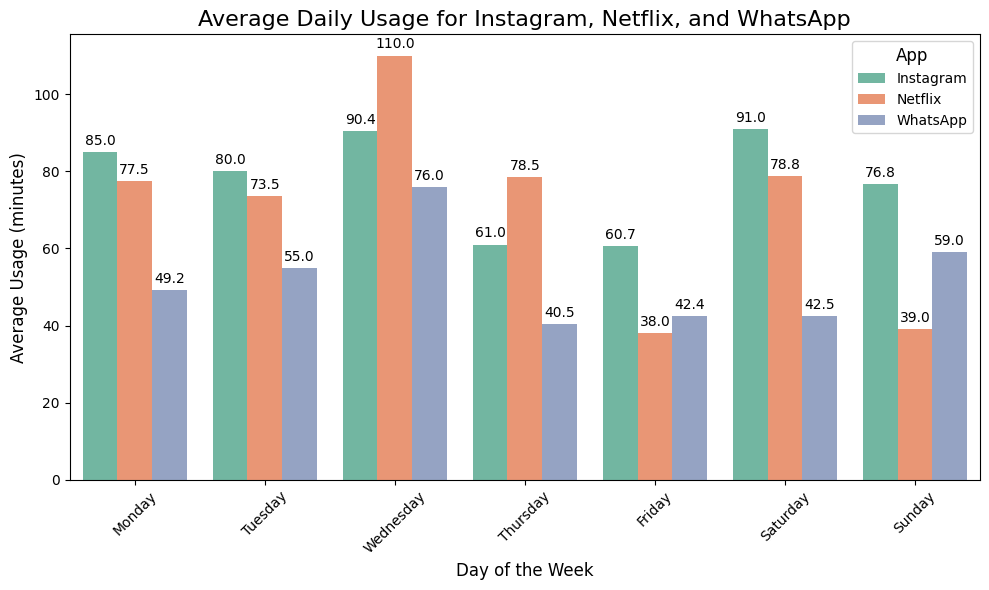

In [14]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Day of Week', y='Usage (minutes)', hue='App', data=daily_app_usage, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 8), textcoords='offset points')

plt.title('Average Daily Usage for Instagram, Netflix, and WhatsApp', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='App', fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()

<h1 style="color: teal;">App Usage Insights by Day</h1>
<hr>

<h3 style="color: purple;">Key Observations</h3>

<ol>
  <li><b>Instagram:</b>
    <ul>
      <li>Consistently has the <b>highest usage</b>, especially on <b>Saturday</b> and <b>Wednesday</b>.</li>
    </ul>
  </li>
  <li><b>Netflix:</b>
    <ul>
      <li>Usage <b>peaks on Wednesday</b> and <b>Saturday</b>, showing strong <b>mid-week and weekend engagement</b>.</li>
    </ul>
  </li>
  <li><b>WhatsApp:</b>
    <ul>
      <li>Usage is generally <b>lower</b> than Instagram and Netflix, with the highest usage on <b>Sunday</b> and <b>Wednesday</b>.</li>
    </ul>
  </li>
  <li><b>Overall Screen Time:</b>
    <ul>
      <li><b>Wednesday</b> and <b>Saturday</b> are the days with the <b>highest overall screen time</b> across these three apps.</li>
    </ul>
  </li>
  <li><b>Usage Comparison:</b>
    <ul>
      <li><b>Netflix</b> and <b>Instagram</b> have <b>greater usage rates</b> than WhatsApp.</li>
      <li><b>Netflix</b> is something we watch for a long time, while <b>Instagram</b> is something we explore for a while.</li>
      <li><b>WhatsApp</b> is more <b>transactional</b>: we open it to answer a message and then close it. Unlike Netflix and Instagram, WhatsApp offers <b>nothing to browse</b> or spend more time doing.</li>
    </ul>
  </li>
</ol>

---


* ***Calculating the Probability of App Openings Through Notifications***

<h1 style="color: teal;">Probability of App Opening from Notifications</h1>
<hr>

<h3 style="color: purple;">Calculation Steps</h3>

<ol>
  <li><b>Step 1:</b> Calculate the number of instances where there were notifications (i.e., <b>Notifications > 0</b>).</li>
  <li><b>Step 2:</b> Calculate how often the app was opened on those days (i.e., <b>Times Opened > 0</b>).</li>
</ol>

<hr>

<h3 style="color: purple;">Probability Calculation</h3>
<p>The probability of opening the app given that a notification was received is calculated as:</p>

<p style="font-size: 18px; font-family: 'Courier New', monospace; text-align: center;">
  <b>P(Open | Notification)</b> =
  <i>Number of days the app was opened when notifications were received</i> /
  <i>Total number of days notifications were received</i>
</p>

---


In [15]:
notifications_data = data[data['Notifications'] > 0]

app_opened_when_notif = notifications_data.groupby('App').apply(
    lambda x: (x['Times Opened'] > 0).sum() / len(x)
).reset_index(name='Probability of Open with Notification')

app_opened_when_notif

,App,Probability of Open with Notification
0,8 Ball Pool,1.0
1,Facebook,1.0
2,Instagram,1.0
3,LinkedIn,1.0
4,Netflix,1.0
5,Safari,1.0
6,WhatsApp,1.0
7,X,1.0


<h1 style="color: teal;">App Notification Response Insights</h1>
<hr>

<h3 style="color: purple;">Key Observation</h3>
<p>
  For all listed apps, including <b>8 Ball Pool</b>, <b>Facebook</b>, <b>Instagram</b>, <b>LinkedIn</b>, <b>Netflix</b>, <b>Safari</b>, <b>WhatsApp</b>, and <b>X (formerly Twitter)</b>, the probability of opening the app upon receiving a notification is <b>1.0</b>.
</p>
<p>This means that every time a notification is received for any of these apps, the user opens the app. This indicates <b>strong responsiveness to notifications</b> across all the apps, suggesting that <b>notifications are a highly effective way</b> to prompt user engagement.</p>

<hr>

<h3 style="color: purple;">Recommendation</h3>
<p>If the user wants to <b>decrease screen time</b>, the first step should be to <b>turn off the notifications</b> for these apps.</p>

---


### ***Feature Enginerring***

In [16]:
data['IsWeekend'] = data['Day of Week'].isin(['Saturday', 'Sunday']).astype(int)

In [17]:
data['average_usage_per_open'] = data['Usage (minutes)'] / data['Times Opened']

In [18]:
correlation_features = data[['Usage (minutes)','Notifications', 'Times Opened', 'average_usage_per_open']]

# Calculate the correlation matrix
correlation_matrix = correlation_features.corr()




---


> ***Relationships Between Key User Metrics***




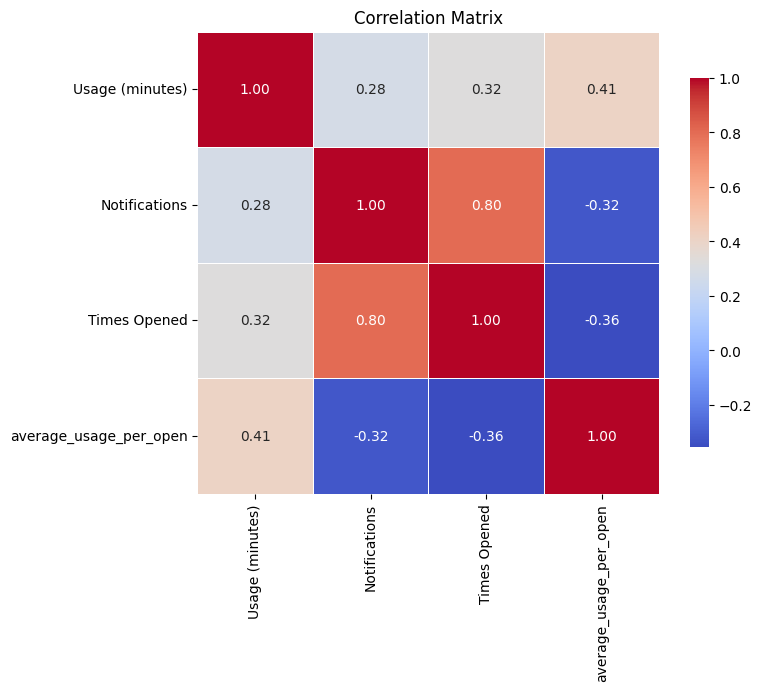

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<h1 style="color: teal;">Correlation Insights</h1>
<hr>

<h3 style="color: purple;">Key Observations</h3>

<ul>
  <li><b>Strong Positive Correlation:</b>
    <ul>
      <li>A strong positive correlation exists between <b>"Notifications"</b> and <b>"Times Opened"</b>, suggesting that as the number of notifications increases, the frequency of app openings significantly rises.</li>
    </ul>
  </li>

  <li><b>Moderate Positive Correlation:</b>
    <ul>
      <li>There is a moderate positive correlation between <b>"Times Opened"</b> and <b>"Usage (minutes)"</b>, indicating that more frequent app openings lead to longer usage durations. However, the relationship is less pronounced than the previous one.</li>
    </ul>
  </li>

  <li><b>Weak Negative Correlation:</b>
    <ul>
      <li>A weak negative correlation exists between <b>"Notifications"</b> and <b>"Average Usage per Open"</b>, implying that a higher number of notifications might lead to shorter individual usage sessions. This could be due to users quickly checking notifications and then closing the app.</li>
    </ul>
  </li>

  <li><b>Moderate Positive Correlation:</b>
    <ul>
      <li>A moderate positive correlation exists between <b>"Usage (minutes)"</b> and <b>"Average Usage per Open"</b>, indicating that longer usage sessions are associated with longer average usage per session.</li>
    </ul>
  </li>
</ul>

---


### ***Feature Selection and Modeling***

In [20]:
features = ['Notifications', 'Times Opened', 'IsWeekend', 'average_usage_per_open']

In [21]:
X = data[features]
y = data['Usage (minutes)']

In [22]:
# Model Selection and Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize the model
RFR_Model = RandomForestRegressor(random_state=42)

In [24]:
# Train the model
RFR_Model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Model Evaluation
y_pred = RFR_Model.predict(X_test)

In [26]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 5.3885
Mean Squared Error: 57.068960000000004
R² Score: 0.9168245552029324




---

***Hyperparameter Tuning***

In [27]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
# Final Model Training
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [29]:
# Predict and evaluate again with best model
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
print(f'Best Model Mean Absolute Error: {mae_best}')

Best Model Mean Absolute Error: 5.3767227600980885




---


***Users are segmented based on predicted usage into categories for targeted marketing***


In [30]:
data['Predicted Usage'] = RFR_Model.predict(X)
data['User Segment'] = pd.cut(data['Predicted Usage'], bins=[0, 30, 60, 120, np.inf], labels=['Light', 'Moderate', 'Heavy', 'Very Heavy'])
print(data[['App', 'Predicted Usage', 'User Segment']])

           App  Predicted Usage User Segment
0    Instagram            81.88        Heavy
1    Instagram            84.00        Heavy
2    Instagram            95.22        Heavy
3    Instagram            79.78        Heavy
4    Instagram            53.18     Moderate
..         ...              ...          ...
195   LinkedIn            22.41        Light
196   LinkedIn             7.43        Light
197   LinkedIn            19.24        Light
198   LinkedIn            22.86        Light
199   LinkedIn            14.04        Light

[200 rows x 3 columns]


In [31]:
actual_segments = pd.cut(data['Usage (minutes)'], bins=[0, 30, 60, 120, np.inf], labels=['Light', 'Moderate', 'Heavy', 'Very Heavy'])

# Prepare features for classification
X_class = data[features]

# Spliting the dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, actual_segments, test_size=0.2, random_state=42)

In [32]:
# Train a classification model for user segmentation

classification_model = RandomForestClassifier(random_state=42)
classification_model.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [33]:
# Make predictions
y_pred_class = classification_model.predict(X_test_class)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

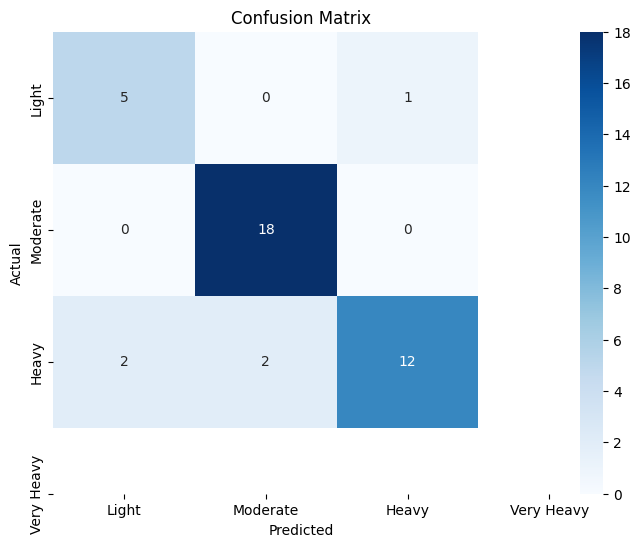

In [40]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Light', 'Moderate', 'Heavy', 'Very Heavy'],
            yticklabels=['Light', 'Moderate', 'Heavy', 'Very Heavy'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Generate a classification report
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

       Heavy       0.71      0.83      0.77         6
       Light       0.90      1.00      0.95        18
    Moderate       0.92      0.75      0.83        16

    accuracy                           0.88        40
   macro avg       0.85      0.86      0.85        40
weighted avg       0.88      0.88      0.87        40



<h1 style="color: teal;">Confusion Matrix Analysis</h1>
<hr>

<h3 style="color: purple;">Overall Performance</h3>
<ul>
  <li>The model seems to be performing well in predicting the <b>"Moderate"</b> class, as indicated by the large value (<b>18</b>) on the diagonal.</li>
  <li>However, it struggles with the <b>"Heavy"</b> class, as seen by the low values on the diagonal for this class.</li>
  <li>The model tends to overpredict the <b>"Very Heavy"</b> class, as there are more instances where it predicts <b>"Very Heavy"</b> when the actual class is <b>"Heavy"</b>.</li>
</ul>

<hr>

<h3 style="color: purple;">Potential Issues</h3>
<ul>
  <li>The model seems to have difficulty distinguishing between the <b>"Heavy"</b> and <b>"Very Heavy"</b> classes.</li>
</ul>

---




>
###***Model Performance and Analysis***


In [36]:
# Predict on the training data
y_train_pred = RFR_Model.predict(X_train)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Training Data: Actual vs Predicted", "Testing Data: Actual vs Predicted"))

# Training Data scatter plot
train_scatter = go.Scatter(
    x=y_train,
    y=y_train_pred,
    mode='markers',
    marker=dict(color='blue', opacity=0.7),
    name='Training Data'
)

# Training Data identity line
train_identity = go.Scatter(
    x=[y_train.min(), y_train.max()],
    y=[y_train.min(), y_train.max()],
    mode='lines',
    line=dict(color='red', width=2),
    name='Identity Line'
)

In [37]:
# Testing Data scatter plot
test_scatter = go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    marker=dict(color='green', opacity=0.7),
    name='Testing Data'
)

# Testing Data identity line
test_identity = go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    line=dict(color='red', width=2),
    name='Identity Line'
)

In [38]:
fig.add_trace(train_scatter, row=1, col=1)
fig.add_trace(train_identity, row=1, col=1)
fig.add_trace(test_scatter, row=1, col=2)
fig.add_trace(test_identity, row=1, col=2)

fig.update_layout(
    height=600, width=1000,
    title_text="Actual vs Predicted Usage (minutes)",
    xaxis_title="Actual Usage (minutes)",
    yaxis_title="Predicted Usage (minutes)",
    showlegend=False
)

fig.update_xaxes(title_text="Actual Usage (minutes)", row=1, col=1)
fig.update_yaxes(title_text="Predicted Usage (minutes)", row=1, col=1)
fig.update_xaxes(title_text="Actual Usage (minutes)", row=1, col=2)
fig.update_yaxes(title_text="Predicted Usage (minutes)", row=1, col=2)

fig.show()

<h1 style="color: teal;">Model Effectiveness in Predicting App Screen Time</h1>
<hr>

<h3 style="color: purple;">Training Data Results</h3>
<ul>
  <li>When we checked the model’s predictions against the actual app usage in the <b>training data</b>, we found that it was <b>highly accurate</b>, with predicted screen time closely matching the actual screen time.</li>
  <li>This tells us that the model successfully learned the patterns in user behavior from this data.</li>
</ul>

<hr>

<h3 style="color: purple;">Testing Data Results</h3>
<ul>
  <li>For the <b>testing data</b>, which the model hadn’t seen before, the predictions were also very close to actual usage values.</li>
  <li>This accuracy on new data shows that the model can reliably predict app usage for new users or timeframes.</li>
</ul>

<hr>

<h3 style="color: purple;">Conclusion</h3>
<p>Overall, the model can effectively anticipate app screen time based on user behavior patterns. This means it’s a useful tool for making predictions about app usage and could help app developers understand and potentially influence healthier screen habits for users.</p>

---
